In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Đọc dữ liệu
data = pd.read_csv('../datas/train_div10.csv')
data_test = pd.read_csv('../datas/test_div10.csv')

In [2]:
import sys
sys.path.append('../extraction')  

from extraction import (
    create_training_data,
    calculate_accelerometer_features,
    calculate_accelerometer_fft_features,
    create_training_data_NN_like_micro
)

x_list, y_list, z_list, train_labels = create_training_data(
    data=data, window_size=20, step_size=10)



x_list_test, y_list_test, z_list_test, train_labels_test = create_training_data(
    data=data_test, window_size=20, step_size=10)


In [3]:
features = calculate_accelerometer_features(
    x_list=x_list, y_list=y_list, z_list=z_list, window_size=20)
# test
features_test = calculate_accelerometer_features(
    x_list=x_list_test, y_list=y_list_test, z_list=z_list_test, window_size=20)

c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:102: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['x_skewness'] = [stats.skew(x) for x in x_list]
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:103: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['y_skewness'] = [stats.skew(y) for y in y_list]
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:104: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['z_skewness'] = [stats.skew(z) for z in z_list]
c:\Users\Admin\Desktop

In [4]:
features = features[["z_median","z_mean","x_mean","x_energy", "z_pos_count",
                            "z_neg_count","x_median", 'z_energy', 'avg_result_accl',
                            'x_neg_count', 'z_std', 'x_pos_count',"y_energy","y_mean","sma", 'y_median'
                            ]]


features_test = features_test[["z_median","z_mean","x_mean","x_energy", "z_pos_count",
                            "z_neg_count","x_median", 'z_energy', 'avg_result_accl',
                            'x_neg_count', 'z_std', 'x_pos_count',"y_energy","y_mean","sma", 'y_median'
                            ]]


In [5]:
features_all = pd.concat([features ], axis=1)
features_all_test = pd.concat([features_test], axis=1)

In [6]:
# Kiểm tra có bao nhiêu giá trị NaN
print("🔍 Số NaN trong mỗi cột:")
print(features_all.isna().sum().sort_values(ascending=False).head(10))

🔍 Số NaN trong mỗi cột:
z_median           0
z_mean             0
x_mean             0
x_energy           0
z_pos_count        0
z_neg_count        0
x_median           0
z_energy           0
avg_result_accl    0
x_neg_count        0
dtype: int64


In [7]:
features_all = features_all.fillna(features_all.mean())
features_all_test = features_all_test.fillna(features_all_test.mean())

🌲 Training Random Forest (optimized)...
🎯 Test Accuracy: 0.9946
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2863
           2       1.00      1.00      1.00       805
           3       0.99      1.00      0.99      2417
           4       1.00      0.91      0.95       240

    accuracy                           0.99      6325
   macro avg       1.00      0.98      0.99      6325
weighted avg       0.99      0.99      0.99      6325



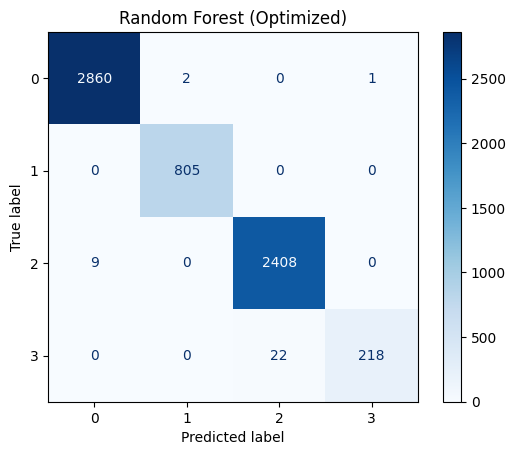

In [8]:
from models import train_RF
modelRF = train_RF(features_all, features_all_test, train_labels, train_labels_test)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 15675it [09:14, 27.97it/s]                           


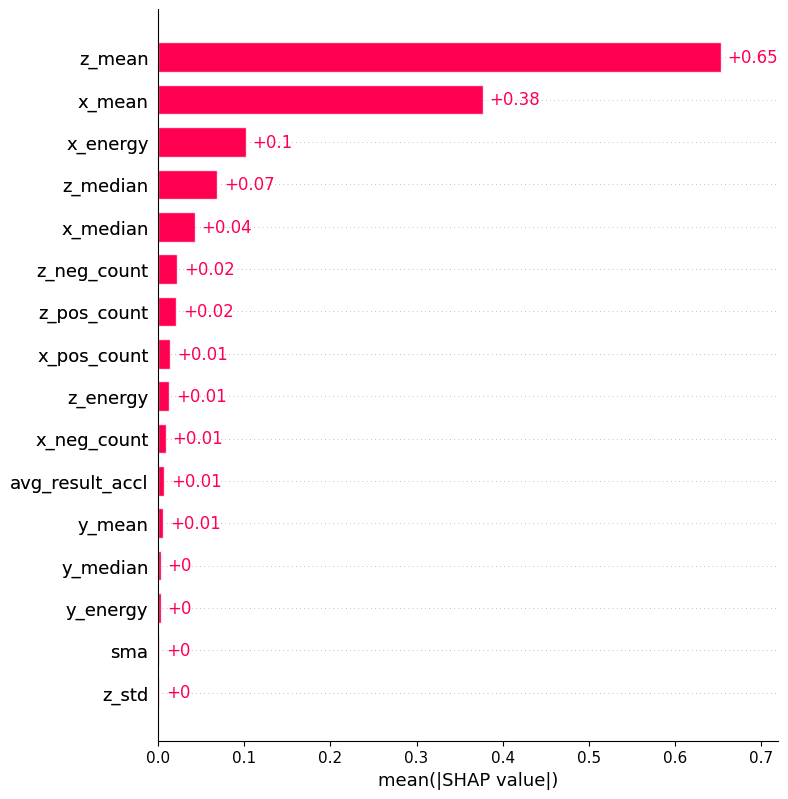

In [9]:
import shap

explainer = shap.Explainer(modelRF.predict, features_all)
shap_values = explainer(features_all)
shap.plots.bar(shap_values, max_display=50)

📈 Training Logistic Regression (optimized)...
🔍 Mẫu dòng đầu tiên (sau fit scaler):
z_median            0.709000
z_mean              0.731450
x_mean              0.013950
x_energy            0.010229
z_pos_count        20.000000
z_neg_count         0.000000
x_median           -0.041000
z_energy            0.537071
avg_result_accl     0.949794
x_neg_count        15.000000
z_std               0.045301
x_pos_count         5.000000
y_energy            0.354838
y_mean              0.591800
sma                 1.402800
y_median            0.626000
Name: 0, dtype: float64
🔍 Ma trận sau khi chuẩn hóa:
[[ 0.94651305  0.98172307 -0.00853982 -0.9176124   0.97151205 -0.97046038
  -0.09637292  0.29551449 -0.07928604  0.51678217  1.01377415 -0.51199705
   1.90916752  1.66867309  0.75323795  1.79441874]
 [ 0.97024424  0.99114914 -0.1180953  -0.93551662  0.97151205 -0.97046038
  -0.12065809  0.31835228 -0.22862834  1.03394048  0.44041089 -1.02974836
   1.81688707  1.63588091  0.57172172  1.70090669]
 

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.0017389489450694577. Increase the number of iterations.
  warnings.warn(


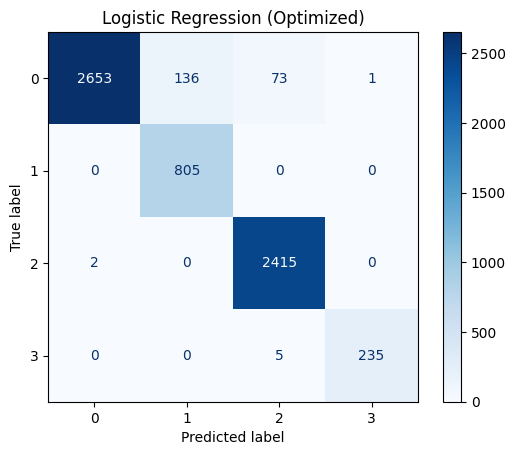

In [10]:
from models import train_LR
modelLR, scalerLr = train_LR(features_all, features_all_test, train_labels, train_labels_test)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21988\3678493678.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_scaled, plot_type="bar", max_display=50)


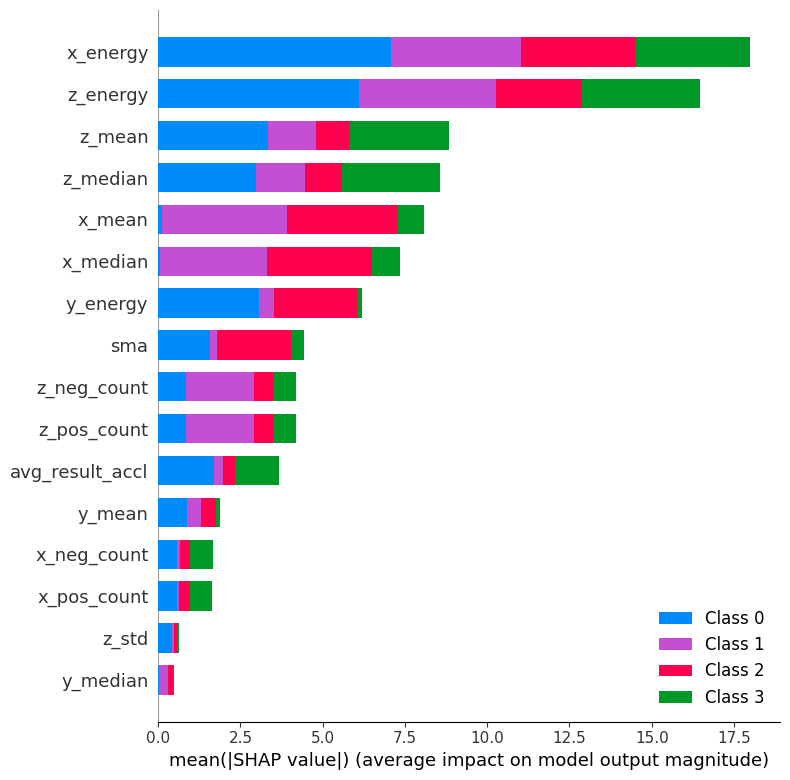

In [11]:
import shap
import pandas as pd

# ⚙️ Bước 1: Đảm bảo features_all là DataFrame có tên cột
# (bạn đã làm đúng ở trên với features và features_fft)
# ⚠️ Tuy nhiên sau khi chuẩn hóa, cần gắn lại tên cột:
X_scaled = scalerLr.transform(features_all)
X_scaled = pd.DataFrame(X_scaled, columns=features_all.columns)

# ⚙️ Bước 2: Tạo LinearExplainer
explainer = shap.LinearExplainer(modelLR, X_scaled, feature_names=features_all.columns)

# ⚙️ Bước 3: Tính SHAP values
shap_values = explainer.shap_values(X_scaled)

# ⚙️ Bước 4: Vẽ biểu đồ SHAP
shap.summary_plot(shap_values, X_scaled, plot_type="bar", max_display=50)

💡 Training SVM (optimized)...
🎯 Test Accuracy: 0.9486
              precision    recall  f1-score   support

           1       1.00      0.89      0.94      2863
           2       0.89      1.00      0.94       805
           3       0.92      1.00      0.96      2417
           4       1.00      0.99      0.99       240

    accuracy                           0.95      6325
   macro avg       0.95      0.97      0.96      6325
weighted avg       0.95      0.95      0.95      6325



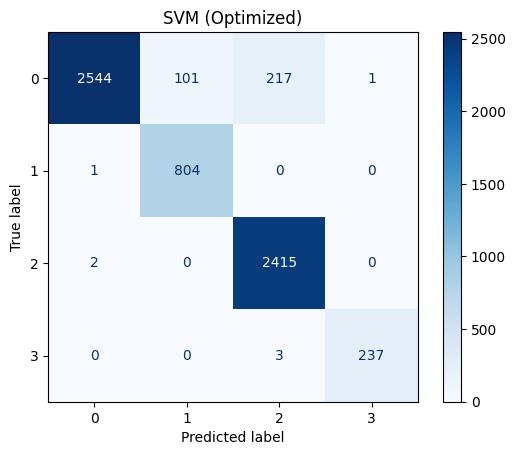

In [12]:
from models import train_SVM
modelSVM, scalerSVM = train_SVM(features_all, features_all_test, train_labels, train_labels_test)

🔥 Training Gradient Boosting (optimized)...
🎯 Test Accuracy: 0.9967
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2863
           2       1.00      1.00      1.00       805
           3       1.00      1.00      1.00      2417
           4       1.00      0.99      0.99       240

    accuracy                           1.00      6325
   macro avg       1.00      1.00      1.00      6325
weighted avg       1.00      1.00      1.00      6325



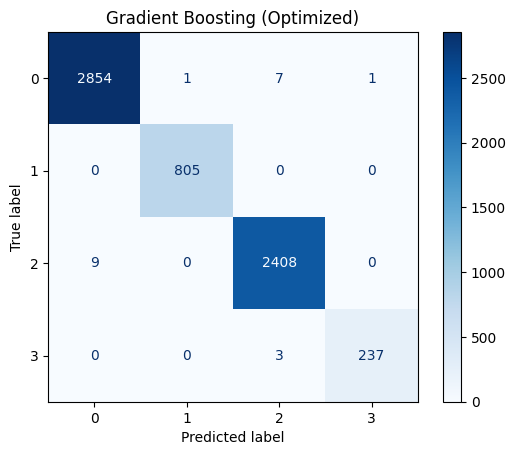

In [13]:
from models import train_GB
modelGB, scalerGB = train_GB(features_all, features_all_test, train_labels, train_labels_test)


In [18]:
import joblib
import os
import numpy as np

def get_model_size_kb(model, scaler, name):
    """Lưu model & (nếu có) scaler, tính dung lượng và số tham số"""
    model_path = f"{name}_model.pkl"
    joblib.dump(model, model_path)
    model_kb = os.path.getsize(model_path) / 1024

    total_kb = model_kb
    scaler_kb = 0

    # 🔹 Lưu scaler nếu có
    if scaler is not None:
        scaler_path = f"{name}_scaler.pkl"
        joblib.dump(scaler, scaler_path)
        scaler_kb = os.path.getsize(scaler_path) / 1024
        total_kb += scaler_kb

    # 🔹 In kích thước
    print(f"📦 {name}: Model = {model_kb:.2f} KB | Scaler = {scaler_kb:.2f} KB | Total = {total_kb:.2f} KB")

    # 🔹 Nếu là mô hình tuyến tính (LR, SVM)
    if hasattr(model, "coef_"):
        n_params = np.prod(model.coef_.shape) + len(model.intercept_)
        print(f"🔢  → Số tham số huấn luyện: {n_params}")

    # 🔹 Nếu là mô hình cây (RF, GB)
    elif hasattr(model, "estimators_"):
        try:
            n_nodes = 0
            for est in model.estimators_:
                # GradientBoosting có thể là mảng 2D các cây con
                if isinstance(est, (list, np.ndarray)):
                    for sub_est in est:
                        if hasattr(sub_est, "tree_"):
                            n_nodes += sub_est.tree_.node_count
                else:
                    if hasattr(est, "tree_"):
                        n_nodes += est.tree_.node_count
            print(f"🌲  → Tổng số nút trong mô hình cây: {n_nodes}")
        except Exception as e:
            print(f"⚠️  Không thể đếm số nút (lý do: {e})")

    print("-" * 70)
    return total_kb


In [21]:
get_model_size_kb(modelRF, None, "RandomForest")
get_model_size_kb(modelLR, scalerLr, "LogisticRegression")
get_model_size_kb(modelSVM, scalerSVM, "SVM")
get_model_size_kb(modelGB, scalerGB, "GradientBoosting")

📦 RandomForest: Model = 48.10 KB | Scaler = 0.00 KB | Total = 48.10 KB
🌲  → Tổng số nút trong mô hình cây: 406
----------------------------------------------------------------------
📦 LogisticRegression: Model = 1.40 KB | Scaler = 1.51 KB | Total = 2.90 KB
🔢  → Số tham số huấn luyện: 68
----------------------------------------------------------------------
📦 SVM: Model = 9.69 KB | Scaler = 1.51 KB | Total = 11.19 KB
🔢  → Số tham số huấn luyện: 102
----------------------------------------------------------------------
📦 GradientBoosting: Model = 128.89 KB | Scaler = 1.51 KB | Total = 130.39 KB
🌲  → Tổng số nút trong mô hình cây: 1128
----------------------------------------------------------------------


130.39453125